<a href="https://colab.research.google.com/github/dpk-a7/Deep-learning/blob/main/Image_classification_BiRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp "kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json# For competition datasets
!kaggle competitions download -c digit-recognizer

{"username":"deepakavudiappan","key":"f85a7e006b065d4a782c1ab2b3ff214e"}chmod: cannot access '/root/.kaggle/kaggle.json#': No such file or directory
chmod: cannot access 'For': No such file or directory
chmod: cannot access 'competition': No such file or directory
chmod: cannot access 'datasets': No such file or directory
 82% 5.00M/6.09M [00:00<00:00, 42.5MB/s]
100% 6.09M/6.09M [00:00<00:00, 39.0MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.0MB/s]
 55% 5.00M/9.16M [00:00<00:00, 40.5MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.6MB/s]


In [6]:
!unzip test.csv.zip 
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [8]:
!rm test.csv.zip 
!rm train.csv.zip

In [22]:
from __future__ import print_function, division
from builtins import range, input
import os
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def get_mnist(limit= None):
  print("Reading in and trasforming data...")
  df = pd.read_csv("train.csv")
  data = df.values
  np.random.shuffle(data)
  X = data[:, 1:].reshape(-1,28,28)/255.0 #data is from 0  to 255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit],Y[:limit]
  return X,Y

In [19]:
X,Y = get_mnist()

Reading in and trasforming data...


In [20]:
D = 28 #h x w
M = 15

In [23]:
# input is an image of size 28x28
input_ = Input(shape=(D,D))
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_) # output is N x D x 2M
x1 = GlobalMaxPooling1D()(x1) # output is N x 2M
# left-right
rnn2 = Bidirectional(LSTM(M, return_sequences=True))

# custom layer
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0,2,1)))

x2 = permutor(input_)
x2 = rnn2(x2) # output is N x D x 2M
x2 = GlobalMaxPooling1D()(x2) # output is N x 2M

# put them together
concatenator = Concatenate(axis= 1)
x = concatenator([x1,x2]) #output is N x 4M

# final dense layer
output = Dense(10, activation='softmax')(x)
model = Model(inputs = input_, outputs = output)

In [24]:
# tests
print("o.shape:",model.predict(X).shape)

o.shape: (42000, 10)


In [25]:
# compile
model.compile(
    loss = 'sparse_categorical_crossentropy', #categorical_crossentropy requires onehot encoded targets which takes-up space, so sparse_categorical_crossentropy don't take onehot encoded targets
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [27]:
# train
print("Training Model")
r = model.fit(X,Y, batch_size=32, epochs=10,validation_split=0.3)

Training Model
Epoch 1/10
919/919 [==============================] - 43s 33ms/step - loss: 1.3076 - accuracy: 0.6394 - val_loss: 0.3045 - val_accuracy: 0.9185
Epoch 2/10
919/919 [==============================] - 28s 30ms/step - loss: 0.2568 - accuracy: 0.9313 - val_loss: 0.1927 - val_accuracy: 0.9468
Epoch 3/10
919/919 [==============================] - 27s 30ms/step - loss: 0.1690 - accuracy: 0.9524 - val_loss: 0.1542 - val_accuracy: 0.9554
Epoch 4/10
919/919 [==============================] - 27s 30ms/step - loss: 0.1359 - accuracy: 0.9608 - val_loss: 0.1259 - val_accuracy: 0.9638
Epoch 5/10
919/919 [==============================] - 28s 30ms/step - loss: 0.1153 - accuracy: 0.9663 - val_loss: 0.1410 - val_accuracy: 0.9569
Epoch 6/10
919/919 [==============================] - 27s 30ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.1169 - val_accuracy: 0.9648
Epoch 7/10
919/919 [==============================] - 27s 30ms/step - loss: 0.0915 - accuracy: 0.9733 - val_loss: 0.1122 

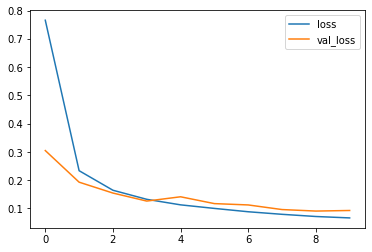

In [28]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

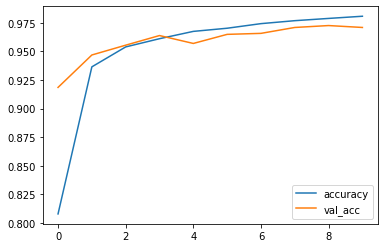

In [29]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show();